# Healthcare: Heart Attack Prediction

### Problem Statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes 
and develop a system to predict heart attacks in an effective   manner. The data below has the information about 
the factors that might have an impact on cardiovascular health. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Description 

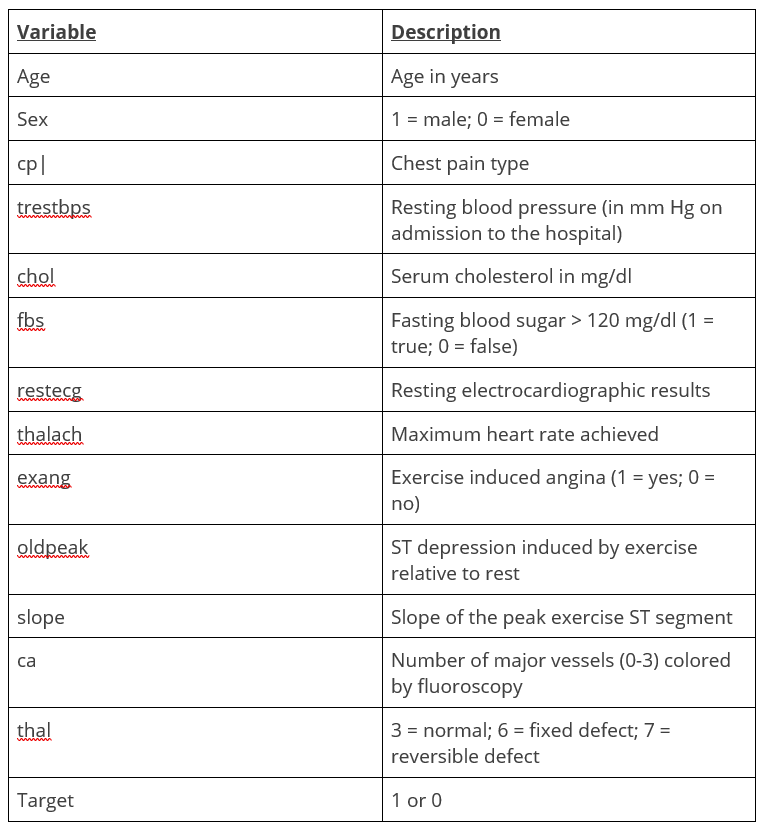

In [2]:
cd C:\Users\sethw\Desktop\Caltech Bootcamp\Machine Learning\Course End Projects\Healthcare

C:\Users\sethw\Desktop\Caltech Bootcamp\Machine Learning\Course End Projects\Healthcare


In [3]:
# import data into dataframe
df = pd.read_excel('heart attack.xlsx')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
# discover duplicates
duplicates = df[df.duplicated()]

In [7]:
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
# remove duplicates
df = df.drop_duplicates()

In [9]:
df.shape

(302, 14)

In [10]:
# check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Important Inferences from above^
1. Mean age is 54
2. Most data is from males
3. Fasting blood pressue is mostly negative/false with a mean of .14 meaning that this feature may not be valuable for making predictions
4. Exercised induced angina is mostly negative/false, may have less significance as a feature for prediction model

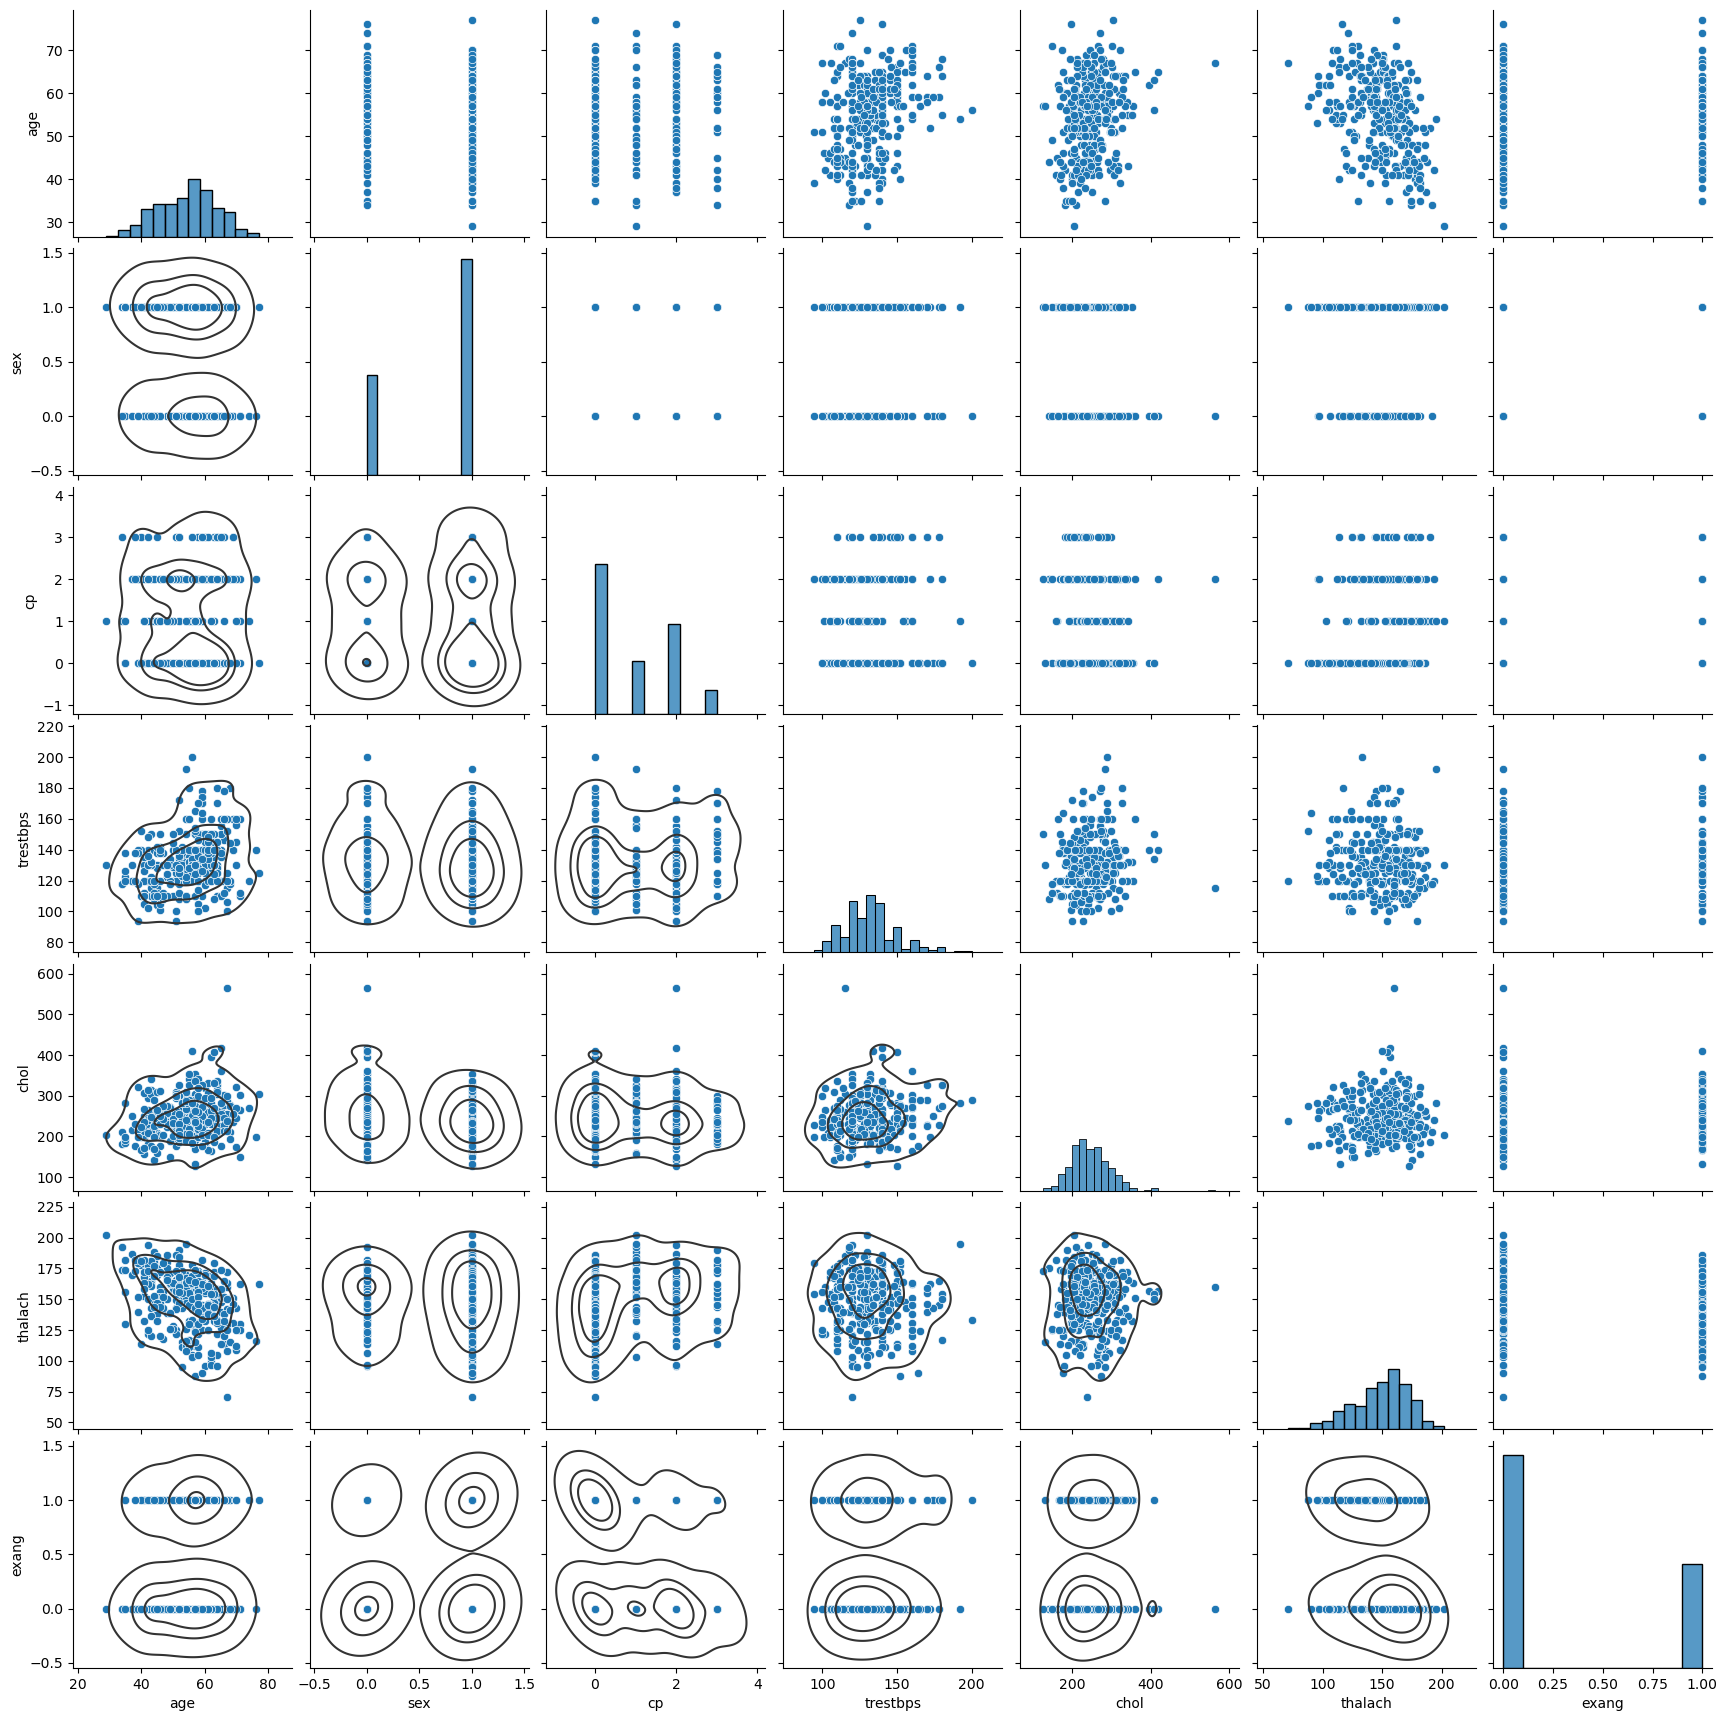

In [13]:
# mapping most significant features chosen based on opinion 
g = sns.pairplot(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang']])
g.map_lower(sns.kdeplot, levels=4, color=".2")

## Inferences from above graphs^
1. Max heart rate shows mild correlation with age
2. Data does not show strong correlation between any of the features selected

## Plotting single focused graphs for better interpretation of some features

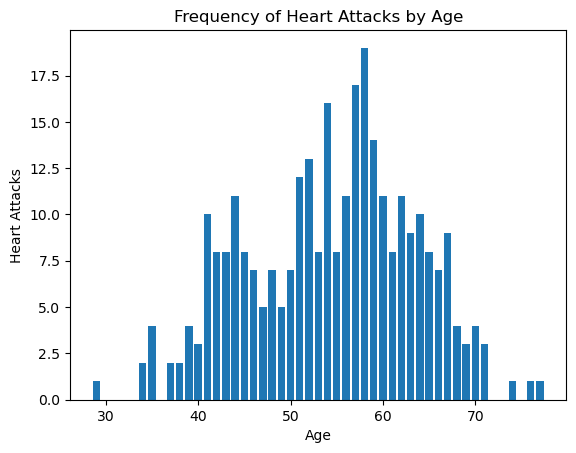

In [14]:
# plotting heart attack occurences by age
age_heart_attack_counts = df.groupby('age')['target'].count()

plt.bar(age_heart_attack_counts.index, age_heart_attack_counts.values)
plt.xlabel('Age')
plt.ylabel('Heart Attacks')
plt.title('Frequency of Heart Attacks by Age')
plt.show()

## Inferences from above^
1. Heart attack occurences peak for people in the mid to late 50's
2. There is a second peak in heart attack occurences for 40 year olds

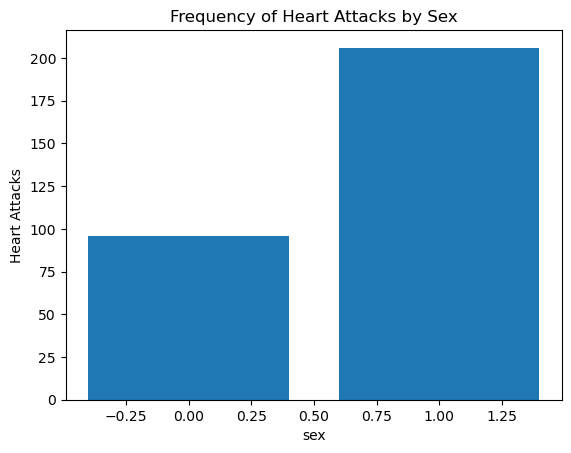

In [15]:
# plotting heart attack occurences by sex
age_heart_attack_counts = df.groupby('sex')['target'].count()

plt.bar(age_heart_attack_counts.index, age_heart_attack_counts.values)
plt.xlabel('sex')
plt.ylabel('Heart Attacks')
plt.title('Frequency of Heart Attacks by Sex')
plt.show()

## Inferences from above^
1. Men are 2X as likely to have heart attack (important feature)

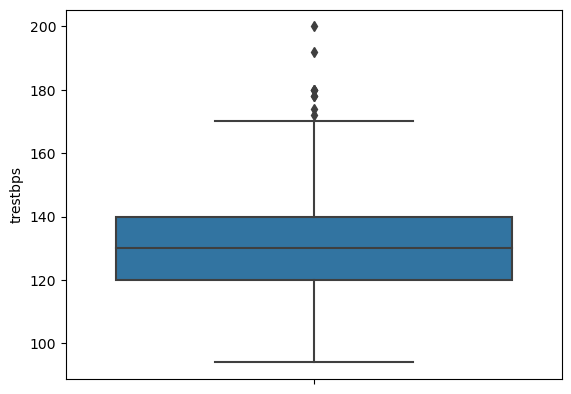

<Figure size 800x600 with 0 Axes>

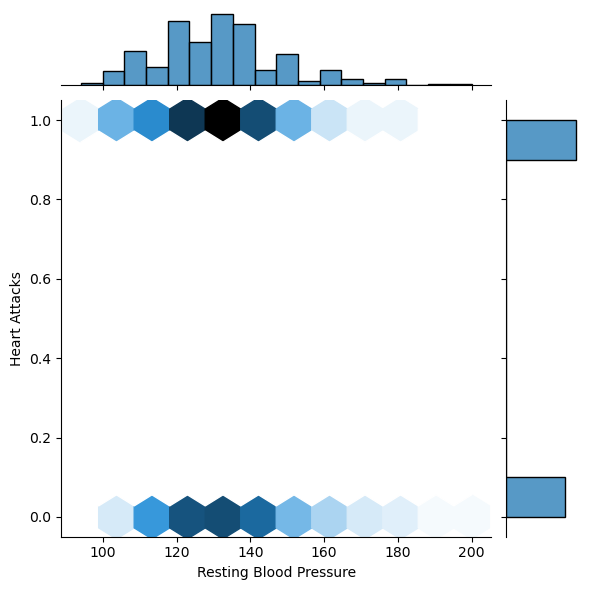

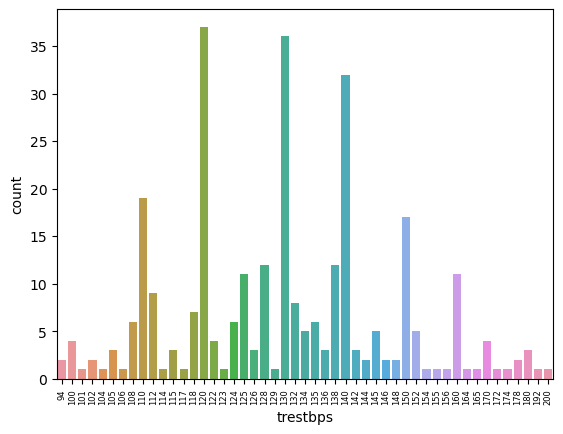

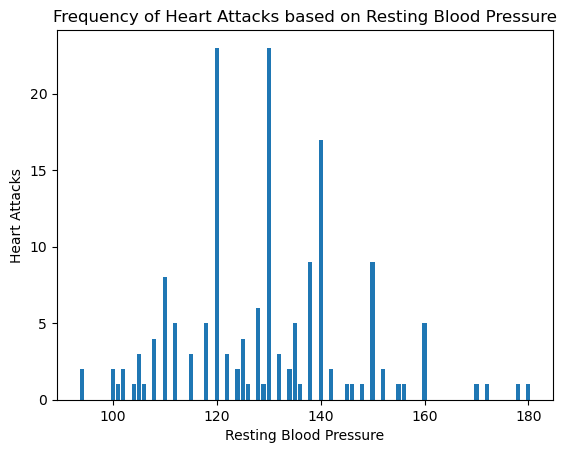

In [16]:
sns.boxplot(y = 'trestbps', data=df)
plt.show()

plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='trestbps', y='target', kind='hex')
# plt.suptitle('')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Heart Attacks')
plt.show()

sns.countplot(x = 'trestbps', data=df)
#plt.tick_params(axis='y', labelsize=5)
plt.xticks(rotation=90, fontsize = 6, ha='center') 
plt.show()
# plotting heart attack occurences by resting blood pressure
bp_heart_attack_counts = df[df['target'] == 1].groupby('trestbps')['target'].sum()

plt.bar(bp_heart_attack_counts.index, bp_heart_attack_counts.values)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Heart Attacks')
plt.title('Frequency of Heart Attacks based on Resting Blood Pressure')
plt.show()

## Inferences fropm above^
1. There seems to be no correlation between frequency of heart attacks and blood pressure, barplots would show negative skews if that was the case
2. Outliers that show very high resting blood pressures don't seem to have major impact, but likelihood of heart attack in the ranges above 170 resting blood pressure seem to have higher chance of having a heart attack

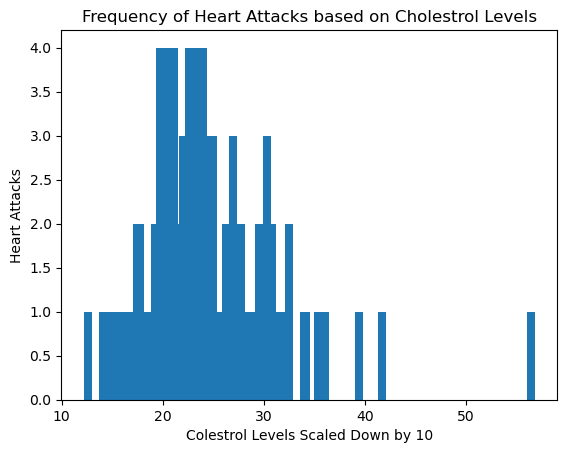

In [17]:
# relationship between cholestrol and target

chol_heart_attack_counts = df[df['target'] == 1].groupby('chol')['target'].sum()

plt.bar(chol_heart_attack_counts.index/10, chol_heart_attack_counts.values)
plt.xlabel('Colestrol Levels Scaled Down by 10')
plt.ylabel('Heart Attacks')
plt.title('Frequency of Heart Attacks based on Cholestrol Levels')
plt.show()

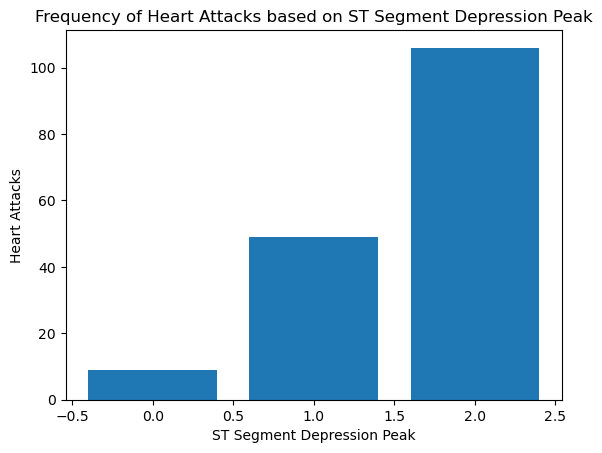

In [18]:
# relationship between slope of peak exercising and heart attack occurrences
slope_heart_attack_counts = df[df['target'] == 1].groupby('slope')['target'].sum()

plt.bar(slope_heart_attack_counts.index, slope_heart_attack_counts.values)
plt.xlabel('ST Segment Depression Peak')
plt.ylabel('Heart Attacks')
plt.title('Frequency of Heart Attacks based on ST Segment Depression Peak')
plt.show()

## Inference from above^
1. High positive correlation between ST Segment Depression peak slope and heart attacks. 

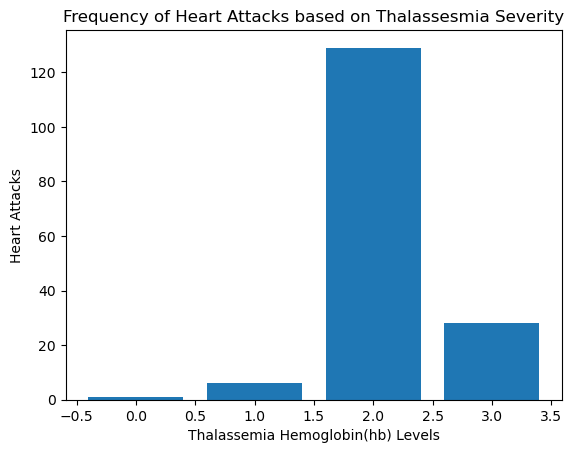

In [19]:
# relationship between thal and heart attacks
thal_heart_attack_counts = df[df['target'] == 1].groupby('thal')['target'].sum()

plt.bar(thal_heart_attack_counts.index, thal_heart_attack_counts.values)
plt.xlabel('Thalassemia Hemoglobin(hb) Levels')
plt.ylabel('Heart Attacks')
plt.title('Frequency of Heart Attacks based on Thalassesmia Severity')
plt.show()

In [20]:
df.thal.describe()

count    302.000000
mean       2.314570
std        0.613026
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

## Inferences from above^
1. All thalessemia hemoglobin levels are within normal range: 3 = nomral, 6 = fixed defect, 7 = reversible defect
2. Despite the observation above, a level of 2 seems to contribute a lot to the occurence of heart attacks

# Building Models: Logistic Regression and Random Forest 

In [21]:
# shuffling rows of data 
shuf_df = df.sample(frac=1, random_state=42)

In [22]:
shuf_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [23]:
target = shuf_df['target']

shuf_df = shuf_df.drop('target', axis=1)
shuf_df.shape

(302, 13)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [25]:
from sklearn.model_selection import train_test_split

x = shuf_df
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

LogReg = LogisticRegression(max_iter=1000)

LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
log_preds = LogReg.predict(x_test)

print(metrics.confusion_matrix(y_test,log_preds))
print(metrics.accuracy_score(y_test,log_preds))

[[40  9]
 [ 7 35]]
0.8241758241758241


In [28]:
print(classification_report(y_test,log_preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        49
           1       0.80      0.83      0.81        42

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



## Inferences from above^ 
1. 82.4% accuracy
2. Recall needs to be imporved. False negatives are dangerous in medical scenarios where people may have been overlooked when they needed treatment. 

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
#rf = RandomForestClassifier(n_estimators = 100)
#rf = RandomForestClassifier(n_estimators = 600)
rf = RandomForestClassifier(n_estimators = 1000)

In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [32]:
rf_preds = rf.predict(x_test)

print(metrics.confusion_matrix(y_test,rf_preds))
print(metrics.accuracy_score(y_test,rf_preds))

[[44  5]
 [ 5 37]]
0.8901098901098901


In [33]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        49
           1       0.88      0.88      0.88        42

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



## Inferences from above^ 
1. 86.8% accuracy
2. Recall improved but not the best at only 86% for heart attack predictions. 

## Ensemble

In [34]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

seed = 7
kfold = model_selection.KFold(n_splits=10)

#Create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart 1', model2))
#model3 = RandomForestClassifier()
#estimators.append(('csrt 2', model3))
model3 = SVC()
estimators.append(('svm', model3))

#Create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8276344086021507


## Inferences from above^ 
1. Variations of Ensemble Model did not improve prediction accuracy
2. Best model for the data is the Random Forest with highest accuracy and recall. 

### Improving Random Forest Classifier with GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 500, 1000],
              'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold)
grid_search.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_estimators=1000),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 500, 1000]})

In [36]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'max_depth': 20, 'n_estimators': 100}
RandomForestClassifier(max_depth=20)


In [37]:
rf = RandomForestClassifier(max_depth=20, n_estimators=500)

rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500)

In [38]:
rf_preds = rf.predict(x_test)

In [39]:
print(metrics.confusion_matrix(y_test,rf_preds))
print(metrics.accuracy_score(y_test,rf_preds))

print(classification_report(y_test,rf_preds))

[[43  6]
 [ 6 36]]
0.8681318681318682
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        49
           1       0.86      0.86      0.86        42

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



## Inferences from above^ 
1. Accuracy improved to 89%
2. Recall also improved to 88%

## Catboost

In [40]:
import catboost
from catboost import CatBoostClassifier
from catboost import MetricVisualizer

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [49]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca']

In [50]:
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'])

model.fit(
    x_train, y_train,
    cat_features=cat_features,
    eval_set=(x_test, y_test),
    verbose=False,
    plot=True)

print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'iterations': 50, 'learning_rate': 0.5, 'random_seed': 63, 'custom_loss': ['AUC', 'Accuracy']}


In [51]:
cat_preds = model.predict(x_test)

# Calculate accuracy using scikit-learn's accuracy_score function
accuracy = accuracy_score(y_test, cat_preds)
print("Accuracy:", accuracy)

Accuracy: 0.9120879120879121
